In [ ]:
import os
import shutil
import pandas as pd

# Chemins
chemin_fichier = "batch_4.csv" 
chemin_images = "validation_filtré" 
chemin_destination = "validation" 

# Charger le fichier CSV
df = pd.read_csv(chemin_fichier, sep=',')

for index, row in df.iterrows():
    image_name = row['image_name']
    category = str(row['category'])
    
    dossier_categorie = os.path.join(chemin_destination, category)
    os.makedirs(dossier_categorie, exist_ok=True)  
    
    image_source = os.path.join(chemin_images, image_name)
    image_dest = os.path.join(dossier_categorie, image_name)
    
    if os.path.exists(image_source):
        shutil.move(image_source, image_dest)
    else:
        print(f"Image non trouvée : {image_source}")

print("Organisation terminée !")


Image non trouvée : validation_filtré\image_631246_product_984304.jpg
Image non trouvée : validation_filtré\image_1063831_product_1157144.jpg
Image non trouvée : validation_filtré\image_137609430_product_1906192.jpg
Image non trouvée : validation_filtré\image_158554130_product_1288702.jpg
Image non trouvée : validation_filtré\image_197401530_product_5913718.jpg
Image non trouvée : validation_filtré\image_310317432_product_46565050.jpg
Image non trouvée : validation_filtré\image_438012288_product_49843702.jpg
Image non trouvée : validation_filtré\image_858194557_product_92413946.jpg
Image non trouvée : validation_filtré\image_874538407_product_102313516.jpg
Image non trouvée : validation_filtré\image_508685383_product_52348929.jpg
Image non trouvée : validation_filtré\image_933246596_product_190099934.jpg
Image non trouvée : validation_filtré\image_875245740_product_120815258.jpg
Image non trouvée : validation_filtré\image_890393093_product_112462775.jpg
Image non trouvée : validation_f

Neural Network perso

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Chemins
chemin_train = "dataset"

img_height, img_width = 150, 150
batch_size = 32

# Préparation des données
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
)
train_generator = train_datagen.flow_from_directory(
    chemin_train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    chemin_train,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])



# Compilation du modèle
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30
)

# Sauvegarde du modèle
model.save("modele_cnn.h5")
print("Modèle entraîné et sauvegardé !")

Found 234 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


Epoch 1/30
8/8 [==============================] - 6s 561ms/step - loss: 13.8667 - accuracy: 0.2863
Epoch 2/30
8/8 [==============================] - 4s 514ms/step - loss: 1.6523 - accuracy: 0.3504
Epoch 3/30
8/8 [==============================] - 4s 465ms/step - loss: 1.6419 - accuracy: 0.3291
Epoch 4/30
8/8 [==============================] - 4s 467ms/step - loss: 1.6649 - accuracy: 0.3889
Epoch 5/30
8/8 [==============================] - 4s 458ms/step - loss: 1.6445 - accuracy: 0.3932
Epoch 6/30
8/8 [==============================] - 4s 517ms/step - loss: 1.6363 - accuracy: 0.3974
Epoch 7/30
8/8 [==============================] - 4s 521ms/step - loss: 1.6686 - accuracy: 0.4188
Epoch 8/30
8/8 [==============================] - 5s 587ms/step - loss: 1.5878 - accuracy: 0.3974
Epoch 9/30
8/8 [==============================] - 6s 670ms/step - loss: 1.5926 - accuracy: 0.4017
Epoch 10/30
8/8 [==============================] - 5s 575ms/step - loss: 1.6310 - accuracy: 0.3889
Epoch 11/30
8/8 [=

Found 119 images belonging to 10 classes.
4/4 [==============================] - 1s 183ms/step


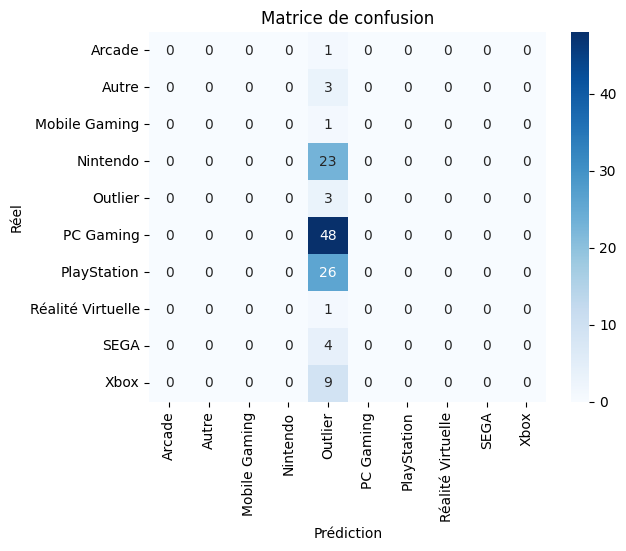

                   precision    recall  f1-score   support

           Arcade       0.00      0.00      0.00         1
            Autre       0.00      0.00      0.00         3
    Mobile Gaming       0.00      0.00      0.00         1
         Nintendo       0.00      0.00      0.00        23
          Outlier       0.03      1.00      0.05         3
        PC Gaming       0.00      0.00      0.00        48
      PlayStation       0.00      0.00      0.00        26
Réalité Virtuelle       0.00      0.00      0.00         1
             SEGA       0.00      0.00      0.00         4
             Xbox       0.00      0.00      0.00         9

         accuracy                           0.03       119
        macro avg       0.00      0.10      0.00       119
     weighted avg       0.00      0.03      0.00       119



C:\Users\jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [19]:
import os
import shutil
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Chemins

chemin_test = "test"

# Paramètres du modèle
img_height, img_width = 150, 150
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator= test_datagen.flow_from_directory(
    chemin_test,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Chargement du modèle
model = keras.models.load_model("modele_cnn.h5")

# Évaluation sur le jeu de test
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

# Rapport de classification
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


Filtre sur les classes peu frèquentes ça sera sans doute à virer quand j'aurai scraper plus d'image

In [ ]:
import os
import shutil

def filtrer_classes(dossier_source, dossier_destination, classes_à_garder):
    if not os.path.exists(dossier_destination):
        os.makedirs(dossier_destination)

    for classe in os.listdir(dossier_source):
        if classe not in classes_à_garder:
            continue
        chemin_classe_source = os.path.join(dossier_source, classe)
        chemin_classe_dest = os.path.join(dossier_destination, classe)
        os.makedirs(chemin_classe_dest, exist_ok=True)

        for image in os.listdir(chemin_classe_source):
            shutil.copy(
                os.path.join(chemin_classe_source, image),
                os.path.join(chemin_classe_dest, image)
            )

# Étape 1 : Identifier les classes valides dans le dataset d'entraînement
dataset_dir = "dataset"
min_images = 10
classes_valides = [cls for cls in os.listdir(dataset_dir)
                   if len(os.listdir(os.path.join(dataset_dir, cls))) >= min_images]

# Étape 2 : Appliquer le filtrage sur les 3 jeux
filtrer_classes("dataset", "dataset_filtré", classes_valides)
filtrer_classes("validation", "validation_filtré", classes_valides)

filtrer_classes("test", "test_filtré", classes_valides)


In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

C:\Users\jimmy\AppData\Local\Temp\ipykernel_25796\2849600788.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


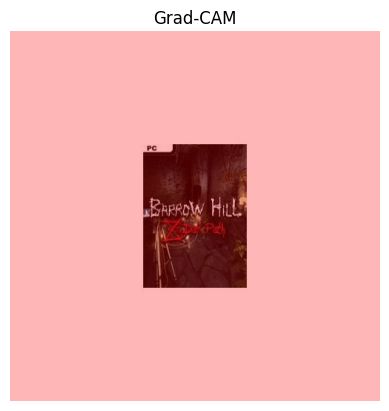

In [ ]:
import tensorflow as tf
import matplotlib.cm as cm

# Fonction pour créer la carte Grad-CAM
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], 
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Choisir une image du test set
img_path = test_generator.filepaths[2]  # ou n'importe quelle image du jeu test
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # même préprocessing que le modèle

# Trouver le nom de la dernière couche convolutionnelle
model.summary()  # Regarde ici le nom de la dernière couche conv
last_conv_layer_name = 'conv2d_8'  # À adapter selon ton modèle !

# Générer la heatmap Grad-CAM
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Superposer la heatmap sur l'image
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.title("Grad-CAM")
    plt.show()

display_gradcam(img_path, heatmap)


Transfert learning baseline c'est ici que j'ai fais mon modéle c'est ça que je dois lancer

Ce script construit et entraîne un modèle de classification d’images par transfert d’apprentissage avec MobileNetV2.
Il utilise des générateurs d’images pour l’entraînement, la validation et le test.
Il applique de l’augmentation de données pour améliorer la robustesse du modèle.
Il utilise un arrêt anticipé pour éviter l’overfitting.
Il sauvegarde le modèle final.
Enfin, il évalue les performances sur le set de test avec une matrice de confusion et des scores de classification.

Found 63 images belonging to 4 classes.


Found 5310 images belonging to 4 classes.
Found 1325 images belonging to 4 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 128)               163968    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                    

C:\Users\jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


166/166 [==============================] - 151s 884ms/step - loss: 1.3129 - accuracy: 0.4166 - val_loss: 1.1604 - val_accuracy: 0.4936
Epoch 2/50
166/166 [==============================] - 148s 892ms/step - loss: 1.1446 - accuracy: 0.5122 - val_loss: 1.0918 - val_accuracy: 0.5464
Epoch 3/50
166/166 [==============================] - 148s 889ms/step - loss: 1.0951 - accuracy: 0.5403 - val_loss: 1.0445 - val_accuracy: 0.5842
Epoch 4/50
166/166 [==============================] - 144s 870ms/step - loss: 1.0430 - accuracy: 0.5657 - val_loss: 1.0621 - val_accuracy: 0.5442
Epoch 5/50
166/166 [==============================] - 144s 866ms/step - loss: 1.0341 - accuracy: 0.5766 - val_loss: 1.0138 - val_accuracy: 0.5834
Epoch 6/50
166/166 [==============================] - 140s 843ms/step - loss: 0.9923 - accuracy: 0.5921 - val_loss: 0.9901 - val_accuracy: 0.5917
Epoch 7/50
166/166 [==============================] - 140s 846ms/step - loss: 0.9759 - accuracy: 0.5985 - val_loss: 0.9775 - val_accura

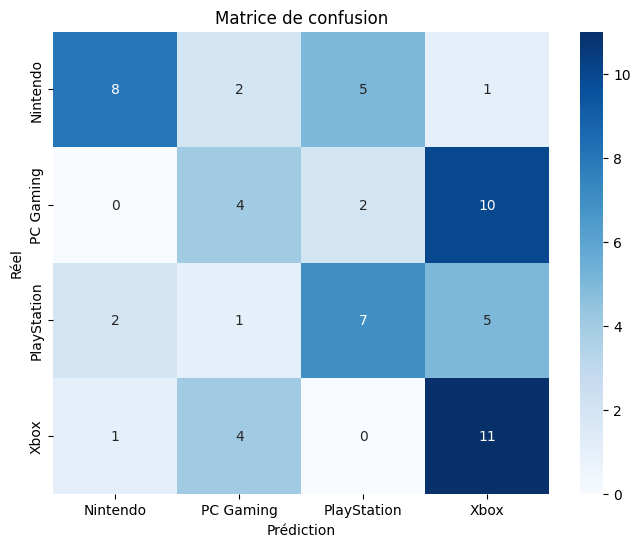


=== Rapport de classification ===
              precision    recall  f1-score   support

    Nintendo       0.73      0.50      0.59        16
   PC Gaming       0.36      0.25      0.30        16
 PlayStation       0.50      0.47      0.48        15
        Xbox       0.41      0.69      0.51        16

    accuracy                           0.48        63
   macro avg       0.50      0.48      0.47        63
weighted avg       0.50      0.48      0.47        63


Accuracy globale : 0.4762
Précision globale : 0.4996


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Définition des paramètres de base pour les images et l'entraînement
img_height, img_width = 150, 150
batch_size = 32
epochs = 50

# Générateur de données pour l'entraînement avec augmentation d'images
train_datagen = ImageDataGenerator(
    rescale=1./255,                   # Normalisation des pixels entre 0 et 1
    rotation_range=30,                # Rotation aléatoire jusqu'à 30 degrés
    width_shift_range=0.1,            # Décalage horizontal aléatoire
    height_shift_range=0.1,           # Décalage vertical aléatoire
    zoom_range=0.2,                   # Zoom aléatoire
    horizontal_flip=True              # Renversement horizontal aléatoire
)

# Générateur de données pour validation et test (uniquement rescale)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Générateur avec split pour auto-créer un ensemble de validation depuis le dossier d'entraînement
train_val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2              # 20% des données pour la validation
)

# Préparation du générateur pour le dossier de test
test_generator = val_test_datagen.flow_from_directory(
    'test_filtré',                    # Dossier des images de test
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',         # Sortie one-hot
    shuffle=False                     # Important pour conserver l'ordre des labels
)

# Préparation du générateur pour l'entraînement (80% des données)
train_generator = train_val_datagen.flow_from_directory(
    'dataset_filtré',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'                 # Prend la partie entraînement du split
)

# Générateur pour la validation (20% des données)
validation_generator = train_val_datagen.flow_from_directory(
    'dataset_filtré',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'               # Prend la partie validation du split
)

# === Construction du modèle avec MobileNetV2 en transfert d'apprentissage ===
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,                # On retire la couche de sortie d'origine
    weights='imagenet'                # Poids pré-entraînés sur ImageNet
)
base_model.trainable = False          # On gèle les poids du modèle de base

# Construction du modèle final
model = models.Sequential([
    base_model,                          # Modèle de base MobileNetV2
    layers.GlobalAveragePooling2D(),     # Pooling pour réduire les dimensions
    layers.Dense(128, activation='relu'),# Couche dense pour apprendre de nouvelles représentations
    layers.Dropout(0.5),                 # Dropout pour éviter le surapprentissage
    layers.Dense(len(train_generator.class_indices), activation='softmax') # Couche de sortie adaptée au nombre de classes
])

# Compilation du modèle
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',      # Fonction de perte adaptée à la classification multi-classe
    metrics=['accuracy']
)

model.summary()  # Affiche la structure du modèle

# === Entraînement avec EarlyStopping pour stopper si la validation ne s'améliore plus ===
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    callbacks=[early_stop]                # Callback pour arrêt anticipé
)

# Sauvegarde du modèle entraîné
model.save("modele_cnn_transfer.h5")
print("Modèle sauvegardé !")

# === Prédictions et analyse des résultats sur l'ensemble de test ===
y_pred = model.predict(test_generator)              # Prédictions sur le test
y_pred_classes = np.argmax(y_pred, axis=1)          # Conversion des prédictions en labels
y_true = test_generator.classes                     # Labels réels
class_labels = list(test_generator.class_indices.keys())  # Noms des classes

# Matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

# Rapport de classification détaillé (précision, rappel, f1-score par classe)
print("\n=== Rapport de classification ===")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Calcul de l'accuracy et précision globale
acc = accuracy_score(y_true, y_pred_classes)
prec = precision_score(y_true, y_pred_classes, average='macro')
print(f"\nAccuracy globale : {acc:.4f}")
print(f"Précision globale : {prec:.4f}")

In [2]:
from PIL import Image
import os

def check_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(root, file)
            try:
                img = Image.open(filepath)
                img.verify()  # Vérifie que c'est bien une image
            except Exception as e:
                print(f"Problème avec le fichier : {filepath} -> {e}")

check_images("dataset_filtré")
check_images("test_filtré")


In [3]:
import os
from PIL import Image, ImageFile

# Autoriser l'ouverture des images tronquées
ImageFile.LOAD_TRUNCATED_IMAGES = True

def clean_images(directory):
    """Supprime les fichiers corrompus ou non-images dans un dossier (récursif)."""
    removed_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(root, file)
            try:
                with Image.open(filepath) as img:
                    img.verify()  # Vérifie que c'est bien une image
            except Exception as e:
                print(f"⚠️ Suppression du fichier : {filepath} ({e})")
                os.remove(filepath)
                removed_files.append(filepath)
    return removed_files

# Nettoyage des dossiers
removed_train = clean_images("dataset_filtré")
removed_test = clean_images("test_filtré")

print("\n=== Résumé ===")
print(f"Fichiers supprimés dans dataset_filtré : {len(removed_train)}")
print(f"Fichiers supprimés dans test_filtré : {len(removed_test)}")



=== Résumé ===
Fichiers supprimés dans dataset_filtré : 0
Fichiers supprimés dans test_filtré : 0


gradcam

Modèle : Construction d’un modèle de classification d’images basé sur MobileNetV2 gelé, avec une tête personnalisée.
Grad-CAM : Génère une carte de chaleur des zones qui influencent le plus la prédiction pour une image donnée.
Affichage : Superpose la carte de chaleur sur l’image d’origine pour visualiser les zones importantes pour la décision du modèle.

Heatmap générée avec succès.


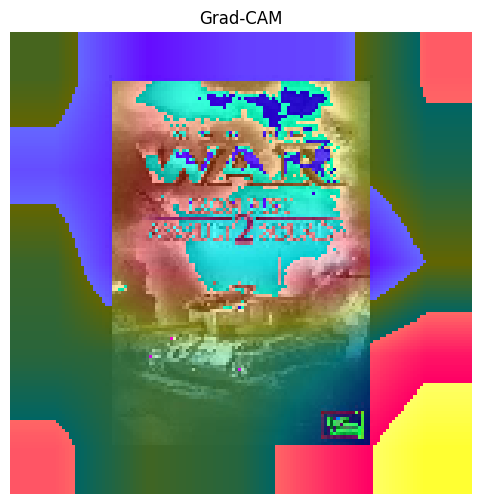

In [ ]:
import cv2  # OpenCV pour le traitement d'images

# Définition de l'entrée du modèle avec une taille d'image spécifique
inputs = tf.keras.Input(shape=(img_height, img_width, 3))

# Chargement du modèle MobileNetV2 pré-entraîné sans la tête de classification d'origine
base_model = tf.keras.applications.MobileNetV2(
    input_tensor=inputs,      # On précise l'entrée personnalisée
    include_top=False,        # On enlève les couches de sortie d'origine
    weights='imagenet'        # On utilise les poids pré-entraînés sur ImageNet
)

base_model.trainable = False  # On gèle tous les poids du modèle de base

# Construction de la tête de classification personnalisée
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)       # Pooling global pour aplatir les features
x = tf.keras.layers.Dense(128, activation='relu')(x)  # Couche dense pour apprendre de nouveaux patterns
x = tf.keras.layers.Dropout(0.5)(x)                   # Dropout pour régulariser
outputs = tf.keras.layers.Dense(4, activation='softmax')(x) # Couche de sortie softmax pour 4 classes

# Création du modèle complet
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# === Fonction Grad-CAM ===
def make_gradcam_heatmap(img_array, grad_model, pred_index=None):
    """
    Crée une carte de chaleur Grad-CAM pour une image donnée et un modèle.
    img_array : image d'entrée (prétraitée, batchée)
    grad_model : modèle Keras qui retourne à la fois la dernière couche conv et la sortie
    pred_index : index de la classe à expliquer (None: la classe prédite)
    """
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)          # Gradients de la classe visée par rapport aux features
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))        # Moyenne globale des gradients (importance de chaque canal)

    conv_outputs = conv_outputs[0]                              # On enlève la dimension batch
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]      # Produit scalaire : pondération des features par l’importance
    heatmap = tf.squeeze(heatmap)                               # Retire la dimension inutile

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap) # On ne garde que les valeurs positives et on normalise

    if heatmap is None:
        print(" heatmap vide.")
    else:
        print("Heatmap générée avec succès.")

    return heatmap.numpy()  # Retourne la carte de chaleur sous forme de tableau numpy

# === Fonction d'affichage du résultat Grad-CAM ===
def display_gradcam(original_img, heatmap, alpha=0.4):
    """
    Superpose la heatmap sur l'image originale et affiche le résultat.
    original_img : l'image originale (non prétraitée)
    heatmap : la carte de chaleur Grad-CAM
    alpha : transparence de la heatmap
    """
    img = cv2.resize(original_img, (img_width, img_height))    # Mise à l'échelle de l'image originale
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))# Mise à l'échelle de la heatmap

    heatmap = np.uint8(255 * heatmap)                          # Conversion en valeurs 0-255 (uint8)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET) # Application d'une palette de couleurs

    superimposed_img = heatmap_color * alpha + img             # Fusion de la heatmap et de l'image originale
    superimposed_img = np.uint8(superimposed_img)              # Conversion en uint8 pour affichage

    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)) # Conversion BGR -> RGB pour matplotlib
    plt.title("Grad-CAM")
    plt.show()

# === Préparation du modèle pour Grad-CAM ===
last_conv_layer_name = "Conv_1"                                # Nom de la dernière couche conv de MobileNetV2
last_conv_layer = base_model.get_layer(last_conv_layer_name).output

# On crée un modèle qui retourne à la fois la sortie de la dernière couche conv et la sortie du modèle global
grad_model = tf.keras.Model(inputs=model.input, outputs=[last_conv_layer, model.output])

# === Traitement d'une image pour Grad-CAM ===
img_path = test_generator.filepaths[30]                        # Prend la 31ème image du set de test
img_pil = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img_pil) # Conversion en tableau numpy
img_array_exp = np.expand_dims(img_array, axis=0) / 255.0      # Ajout d'une dimension batch et normalisation

# Génération de la heatmap Grad-CAM
heatmap = make_gradcam_heatmap(img_array_exp, grad_model)

# Affichage du résultat Grad-CAM superposé à l'image d'origine
display_gradcam(img_array, heatmap) 

gradcam resize test

Heatmap générée avec succès.


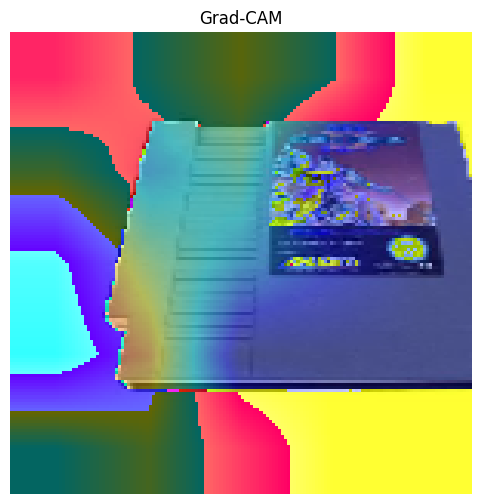

In [ ]:
import cv2
inputs = tf.keras.Input(shape=(img_height, img_width, 3))

def crop_and_resize_from_heatmap(original_img, heatmap, target_size=(224, 224), threshold=0.4):
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap = heatmap / np.max(heatmap)  # normalize
    
    mask = heatmap > threshold
    ys, xs = np.where(mask)

    if len(xs) == 0 or len(ys) == 0:
        print("Aucun hotspot détecté, fallback au resize standard.")
        return cv2.resize(original_img, target_size)
    
    x_min, x_max = xs.min(), xs.max()
    y_min, y_max = ys.min(), ys.max()
    
    # + margin (optional)
    margin = 10
    x_min = max(x_min - margin, 0)
    y_min = max(y_min - margin, 0)
    x_max = min(x_max + margin, original_img.shape[1])
    y_max = min(y_max + margin, original_img.shape[0])
    
    cropped_img = original_img[y_min:y_max, x_min:x_max]
    resized_img = cv2.resize(cropped_img, target_size)
    return resized_img


base_model = tf.keras.applications.MobileNetV2(
    input_tensor=inputs,
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

def make_gradcam_heatmap(img_array, grad_model, pred_index=None):
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    if heatmap is None:
        print("Erreur: la heatmap est vide.")
    else:
        print("Heatmap générée avec succès.")

    return heatmap.numpy()


def display_gradcam(original_img, heatmap, alpha=0.4):
    img = cv2.resize(original_img, (img_width, img_height))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = heatmap_color * alpha + img
    superimposed_img = np.uint8(superimposed_img)

    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title("Grad-CAM")
    plt.show()


last_conv_layer_name = "Conv_1"
last_conv_layer = base_model.get_layer(last_conv_layer_name).output

grad_model = tf.keras.Model(inputs=model.input, outputs=[last_conv_layer, model.output])

img_path = test_generator.filepaths[0]
img_pil = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img_pil)
img_array_exp = np.expand_dims(img_array, axis=0) / 255.0

heatmap = make_gradcam_heatmap(img_array_exp, grad_model)

cropped_img = crop_and_resize_from_heatmap(img_array, heatmap, target_size=(img_width, img_height))
display_gradcam(cropped_img, heatmap)


transfert learning fine tune avec data augmentation

Found 213 images belonging to 4 classes.


Found 41 images belonging to 4 classes.
Found 106 images belonging to 4 classes.
Epoch 1/30
7/7 [==============================] - 9s 904ms/step - loss: 1.9473 - accuracy: 0.3239 - val_loss: 1.5236 - val_accuracy: 0.3415
Epoch 2/30
7/7 [==============================] - 4s 526ms/step - loss: 1.9040 - accuracy: 0.3005 - val_loss: 1.4193 - val_accuracy: 0.3902
Epoch 3/30
7/7 [==============================] - 4s 510ms/step - loss: 1.6402 - accuracy: 0.4319 - val_loss: 1.4694 - val_accuracy: 0.3659
Epoch 4/30
7/7 [==============================] - 4s 513ms/step - loss: 1.5614 - accuracy: 0.4038 - val_loss: 1.4012 - val_accuracy: 0.3902
Epoch 5/30
7/7 [==============================] - 3s 499ms/step - loss: 1.5421 - accuracy: 0.3427 - val_loss: 1.2648 - val_accuracy: 0.4634
Epoch 6/30
7/7 [==============================] - 3s 508ms/step - loss: 1.4997 - accuracy: 0.4038 - val_loss: 1.3156 - val_accuracy: 0.4878
Epoch 7/30
7/7 [==============================] - 3s 475ms/step - loss: 1.3820 

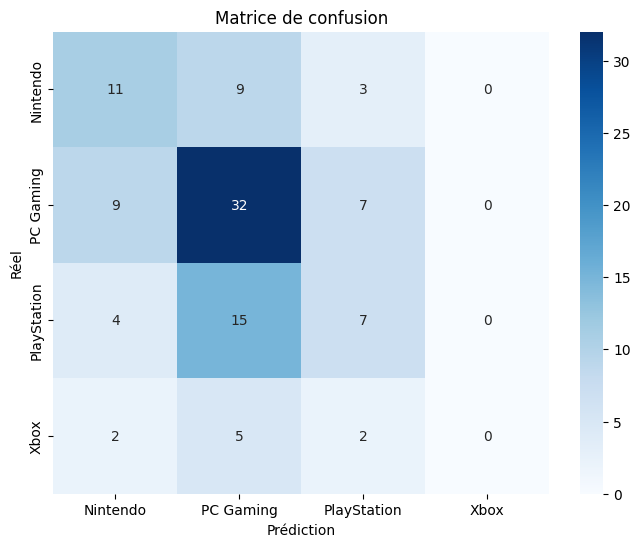


=== Rapport de classification ===
              precision    recall  f1-score   support

    Nintendo       0.42      0.48      0.45        23
   PC Gaming       0.52      0.67      0.59        48
 PlayStation       0.37      0.27      0.31        26
        Xbox       0.00      0.00      0.00         9

    accuracy                           0.47       106
   macro avg       0.33      0.35      0.34       106
weighted avg       0.42      0.47      0.44       106


Accuracy globale : 0.4717
Précision globale : 0.3290


C:\Users\jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight


# === PARAMÈTRES ===
img_height, img_width = 150, 150
batch_size = 32
num_epochs = 30

train_dir = "dataset_filtré"
val_dir = "validation"
test_dir = "test_filtré"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = train_val_datagen.flow_from_directory(
    'dataset_filtré',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
y_train = train_generator.classes

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

base_model = keras.applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # gelé pour première phase

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=num_epochs,
    callbacks=[early_stop]
)

base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fine_tune_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop],
    class_weight=class_weights

)


y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

# === RAPPORT DE CLASSIFICATION ===
print("\n=== Rapport de classification ===")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))
acc = accuracy_score(y_true, y_pred_classes)
prec = precision_score(y_true, y_pred_classes, average='macro')
print(f"\nAccuracy globale : {acc:.4f}")
print(f"Précision globale : {prec:.4f}")

test modéle